# CP 2024-25: Assignment Lecture 2 - Nonlinear equations in R

### General Guidelines

> ⚠️⚠️⚠️ READ CAREFULLY ⚠️⚠️⚠️

- Do not add, delete or create cells, write the answer only in the space marked with the three dots (`...`). Where function skeletons are provided, it is assumed that that function can be called again with different inputs somewhere else. So be careful to write code outside of functions.
  - Function should be ['pure'](https://en.wikipedia.org/wiki/Pure_function), thus no side effects, unless otherwise specified.
- Run the the first cell to import all libraries when opening the notebook before running your own code.
- Read carefully what is required to be printed/returned/plotted in the answer. Please do not output what is not asked for. 
  - If you used the print function for debugging, comment it out ( Ctlr + / ) before submitting
- All plots should have title, xlabel, ylabel, and legend (if there are more than one curve on the plot)
- Use the `help()` function, consult python documentation when using new functions, or do a web search and consult [stackoverflow](https://stackoverflow.com/questions/tagged/python)
- Please read the error messages if you get any, and try to understand what they mean. Debugging code is an essential skill to develop.
- You can use `%debug` to start an IPython console in a cell (or a scratchpad cell!) after an exception has occurred to try to debug.
- You can use `%pdb` to toggle the Python DeBugger (pdb) auto start after an unhandled exception.
- In the assignments you will find some tests put in place, to help you verify your solution. If these fail you are certain you did something wrong, thus look at the hints they provide. But passing these tests does __not__ mean your solution is actually correct.

Make sure you use `python3.11` and the package versions as stated in the provided `requirements.txt`. This file should also be on the course page.

In [ ]:
# Importing relevant libraries in the assignment

# This will create static plots (no zooming etc.)
# otherwise try just plain `%matplotlib`, or install a backend such as ipympl or PyQt5 and
# do or `%matplotlib ipympl` `%matplotlib qt`
%matplotlib inline

REPEAT_IMPORTS = True

if REPEAT_IMPORTS or ("IMPORTED_ALL" not in globals()):  # To save you a bit of time

    def print_import_info(package):
        print(
            "Successfully imported %-15s \tVersion: %10s"
            % (package.__name__, package.__version__)
        )

    ### Standard library imports

    import sys

    print("Python version {}".format(sys.version))
    if sys.version_info < (3, 11):
        print(
            "\u001b[31m"  # red
            "\u001b[1m"  # bold
            "WARNING: Use Python 3.11 or newer to not encounter any errors or "
            "problems later on.\n"
            "\u001b[0m"  # reset
        )
    del sys  # Do not need it anymore

    import functools
    import math
    import typing
    from typing import Callable, List, Optional, Tuple, Union

    ### Import third party libraries
    # Initialize self assessment helper
    import otter

    grader = otter.Notebook("Assignment_Q1_L2.ipynb")

    import numpy as np
    import numpy.typing as npt

    print_import_info(np)
    import scipy

    print_import_info(scipy)
    import matplotlib
    import matplotlib.pyplot as plt

    print_import_info(matplotlib)

    IMPORTED_ALL = True
    print("Finished importing packages")
else:
    print("Already imported all packages")

Python version 3.12.10 (v3.12.10:0cc81280367, Apr  8 2025, 08:46:59) [Clang 13.0.0 (clang-1300.0.29.30)]
Successfully imported numpy           	Version:      2.3.2
Successfully imported scipy           	Version:     1.16.1
Successfully imported matplotlib      	Version:     3.10.5
Finished importing packages


# Part 1: Calculus Recap

### Question 1: The Jacobian
Consider the set of functions $\mathbf{f}=(f_1, f_2)$: 

$f_1(x_1, x_2)=6x_1^3 + 2x_1x_2^2 + \cos(x_2^2)$

$f_2(x_1, x_2)=9x_2^2 + 2x_1^4 + x_2^2x_1^9$

Please write a function `jacobian_manual` that computes the jacobian of $\mathbf{f}$.

In [ ]:
def jacobian_manual(x1: float, x2: float) -> np.ndarray:
    """
    Function to manually compute the jacobian matrix for the given set of functions f1 and f2
    Args:
        x1 (float): value of variable x1
        x2 (float): value of variable x2
    Returns:
        jacobian (np.ndarray)
    """

    f_1 = 6*(x1**3) + 2*x1*(x2**2) + np.cos(x2**2)
    f_2 = 9*(x2**2) + 2*(x1**4) + x2**2*x1**9

    jacobian = np.zeros((2,2))
    jacobian[0,0] = 18*x1**2 + 2*x2**2 
    jacobian[0,1] = 0 + 4*x1*x2 - 2*x2*np.sin(x2**2)
    jacobian[1,0] = 0 + 8*x1**3 + 9*x2**2*x1**8
    jacobian[1,1] = 18*x2 + 0 + 2*x2*x1**9


    return jacobian

In [ ]:
grader.check("q1.1")

q1.1 results: All test cases passed!

### Question 2: Gradient
Define a function `f_value` that computes the output of the function $f(x_1, x_2)=3x_1^2 + 2x_1x_2 + x_2^2$.

In [ ]:
def f_value(x1: float, x2: float) -> float:
    """
    This python function computes the value of the given function f(X1,x2)

    Args:
        x1 (float): Variable x1
        x2 (float): Variable x2

    Returns:
        f (float): function value of f given x1 and x2
    """

    f = 3*x1**2 + 2*x1*x2 + x2**2
    return f

Next, define a function `gradient_manual` that computes the gradient of $f(x_1, x_2)$ given $x_1$ and $x_2$.

In [ ]:
def gradient_manual(x1: float, x2: float) -> np.ndarray:
    """
    This function computes the gradient of the function f(x1,x2)
    Args:
        x1 (float): variable x1
        x2 (float): variable x2
    Returns:
        grad_f (np.ndarray): gradient of f
    """
    

    grad_f = np.zeros((2,1))
    grad_f[0,0] = 6*x1 + 2*x2 + 0 
    grad_f[1,0] = 0 + 2*x1 + 2*x2


    
    return grad_f

In [ ]:
grader.check("q1.2")

q1.2 results: All test cases passed!

Now, test the `f_value` and `gradient_manual` at $x_1$ = 1.0 and $x_2$ = 2.0.

In [ ]:
x1, x2 = 1.0, 2.0
function_value = f_value(x1, x2)
print(f"The function value at (x1, x2) = ({x1}, {x2}): {function_value}")
gradient = gradient_manual(x1, x2)
print(f"Manual gradient at (x1, x2) = ({x1}, {x2}): {gradient}")

The function value at (x1, x2) = (1.0, 2.0): 11.0
Manual gradient at (x1, x2) = (1.0, 2.0): [[10.]
 [ 6.]]


### Question 3: The Hessian
Define a function `hessian_manual` that returns the values of the hessian matrix of the function $f(x_1, x_2)= sin(x_2)x_1+ln(x_2)+x_1^2x_2^3$

In [ ]:
def hessian_manual(x1: float, x2: float) -> np.ndarray:
    """
    This function returns the hessian matrix of function f(x1,x2)=sin(x2)x1 + ln(x2) + x1^2 x2^3
    Args:
        x1 (float): variable x1
        x2 (float): variable x2
    Returns:
        hessian_f (np.ndarray): hessian of f
    """

    hessian_f = np.zeros((2,2))

    hessian_f[0,0] = 0 + 0 +2*x2**3
    hessian_f[0,1] = np.cos(x2) + 0 + 6*x1*x2**2
    hessian_f[1,0] = np.cos(x2) + 0 +6*x1*x2**2
    hessian_f[1,1] = -np.sin(x2)*x1 - 1/(x2**2) + 6*x1**2*x2
    return hessian_f

In [ ]:
grader.check("q1.3")

q1.3 results: All test cases passed!

### Question 4: Taylor polynomials
Define a function `taylor_sin` that takes the input arguments `x` and `degree` that computes the Taylor polynomial of $sin(x)$ at position 0. Hint: the sine function can be written as a power series. Check it out, this could make it easier for you to formulate the Taylor approximation.

In [ ]:
def taylor_sin(x: np.ndarray, degree: int) -> np.ndarray:
    """
    Compute the Taylor series approximation for sin(x) at point 0 up to the given degree.
    Args:
        x (np.ndarray): x values
        degree (int): degree of Taylor polynomial
    Returns:
        approximation (np.ndarray): Taylor approximation for the specified degree
    """

    # approximation = np.zeros((len(degree)),1)
    # for d in degree:
    #     for n in range(1, degree+1, 2):
    #         approximation[d,0] =((-1)**((n-1)//2)) * (x**n)/math.factorial(n)

    approximation = np.zeros_like(x)

    for n in range(1,degree+1,2):
        approximation +=((-1)**((n-1)//2))*(x**n)/math.factorial(n)

    return approximation    

In [ ]:
grader.check("q1.4")

q1.4 results: All test cases passed!

In the following, we compute Taylor polynomials for varying degrees.

In [ ]:
def plot_taylor_sin(x_values: np.ndarray, degrees: int) -> None:
    """Plot the Taylor polynomial approximation against the actual sin(x)."""
    plt.figure(figsize=(10, 6))
    for degree in degrees:
        y_taylor = taylor_sin(x_values, degree)
        plt.plot(x_values, y_taylor, label=f"Taylor Degree {degree}")
    plt.plot(x_values, np.sin(x_values), label="sin(x)", color="black", linewidth=1)
    plt.ylim([-2, 2])
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Taylor Series Approximation of sin(x)")
    plt.grid(True)
    plt.show()

    

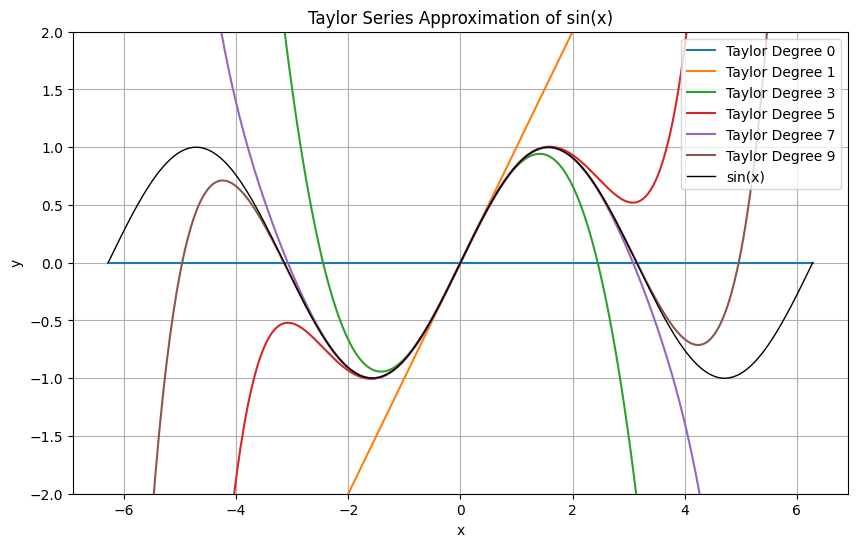

In [ ]:
# Test and plot the Taylor approximation
x_values = np.linspace(-2 * math.pi, 2 * math.pi, 400)
degrees = [0, 1, 3, 5, 7, 9]
plot_taylor_sin(x_values, degrees)

# Part 2: Solving for the Darcy Friction Factor Using the Colebrook-White Equation

In chemical and process engineering, studying the flow of fluids through pipes is a fundamental concern. One critical aspect is related to the frictional loss, which is quantified by the pressure drop along the pipe. This pressure drop is significantly influenced by the Darcy friction factor, $f$, which depends on the pipe's characteristics and the flow conditions.

The Darcy friction factor for turbulent flow is commonly estimated using the Colebrook-White equation, a semi-empirical formula derived from experimental data. This equation relates the friction factor to the pipe's roughness, its diameter, and the Reynolds number of the flow. However, the equation is implicit in $f$, meaning $f$ appears on both sides of the equation, making it challenging to solve directly. Hence, numerical methods for solving nonlinear equations are typically used to find $f$.

The Colebrook-White equation is given by:
$$
 \frac{1}{\sqrt{f}} = -2 \log_{10} \left(\frac{\epsilon}{3.7D} + \frac{2.51}{Re \sqrt{f}}\right)
$$

Where:
- $\epsilon$ is the absolute roughness of the pipe $[m]$,
- $D$ is the internal diameter of the pipe $[m]$,
- $Re$ is the Reynolds number, a dimensionless quantity representing the ratio of inertial forces to viscous forces.

For the purpose of this task, the parameters are set as follows to simplify the problem and focus on the method of solution:
- **Pipe roughness** ($ \epsilon $): 0.0001 $[m]$
- **Pipe diameter** ($ D $): 0.05 $[m]$
- **Reynolds number** ($ Re $): 100,000

These parameters are typical for scenarios involving water flow in small to medium-sized commercial steel pipes.

The task for the assignment comprises three steps:
1. **Implement the Colebrook-White Equation**: Write a Python function named `colebrook_white` that computes the left side minus the right side of the Colebrook-White equation for a given friction factor $f$. This function should return zero when the correct $ f $ is found.
2. **Implement the bisection method**: Write a Python function implementing the bisection method for solving generic nonlinear equations (further details will follow).
3. **Solve for the Friction Factor**: Use the bisection method to numerically solve for $ f $ that satisfies the Colebrook-White equation. You will implement this in another function which uses `colebrook_white` to find the root.

#### Educational Outcome

You will learn how to apply numerical methods to solve implicit nonlinear equations commonly found in engineering. You will also gain practical experience in translating physical equations into computable functions and understand the importance of numerical precision and iterative solution methods.

### Question 1. Implement the Colebrook-White Equation
Write a Python function named `colebrook_white` that computes the left side minus the right side of the Colebrook-White equation for a given friction factor $f$. This function should return zero when the correct $ f $ is found.

In [ ]:
# Define the Colebrook-White equation as a function of f
def colebrook_white(f: float) -> float:
    """
    The residual of the Colebrook-White equation for calculating
    the Darcy friction factor in turbulent flow.

    Parameters:
        f (float): Darcy friction factor (dimensionless)

    Returns:
        residual (float): Residual of the Colebrook-White equation for the given friction factor
    """
    e = 0.00001   #pipe roughness in [m]
    D = 0.05      #pipe diameter in [m]
    Re = 100000   #Reynolds number []

    residual = 1/np.sqrt(f) + 2*np.log10 ((e/(3.7*D)) + 2.51/(Re*np.sqrt(f)))

    return residual

In [ ]:
grader.check("q2.1")

q2.1 results: All test cases passed!

### Question 2: Bisection Method Implementation Task
Implement a function that uses the bisection method to solve nonlinear equations. This method is used to find the root of a function $ f(x) $ within a specified interval $[a, b]$. 
The bisection method is an iterative technique for finding the root of a function. The method works by repeatedly dividing the interval $[a, b]$ in half and selecting the subinterval in which the function changes sign, indicating the presence of a root. This process continues until the function value at the midpoint is close enough to zero (as determined by a specified tolerance).

- The algorithm should stop when the absolute value of the function at the midpoint, $ |f(c)| $, is less than a specified tolerance $ \text{tol} $. This means that $ c $ is close enough to a root of the function.
- The function should return `None` if the initial interval $[a, b]$ does not bracket a root. Specifically, if $ f(a) $ and $ f(b) $ have the same sign, it means that it cannot be guaranteed that there is a root in the interval. The function should return `None` when the conditions are not satisfied.
- Make sure to not only check if the error is below the predetermined tolerance, but to also insert a maximum amount of iterations that must not be exceeded to prevent infinite looping.

Here is the function prompt and docstring you need to implement:

In [ ]:
def bisection_method(
    func: Callable, a: float, b: float, tol: float, i_max: int = 100
) -> Optional[float]:
    """
    Solve a nonlinear equation using the bisection method.

    Parameters:
        func (Callable): The function for which we are trying to find a root.
        a (float): The lower bound of the interval.
        b (float): The upper bound of the interval.
        tol (float): The absolute error tolerance for stopping criteria.
        i_max (int): Maximum number of iterations.

    Returns:
        c (Optional[float]): The approximate root of the function.
    """
    #
    """
    How to code the bisection method:
    1) First set the range between which you want to find your root
    2) Define the points between which your roor is to be found in
        - Note if point at y1 and y2 are both positive there will not be a root 
        -> func(a)*func(b) < 0 for you to find a root, otherwise no root will be found
    3) Find you point c:
        - this should be the midle point between points a and b
    4) Update your a/b values:
        - if func(a)*func(c) > 0 (positive) your new value for a is your c value
        - otherwise b = c
    5) Break the loop if the difference between your b and a value is smaller than the tolerance 
        - this will mean that the root is close enough 

    """
    i = 0
    while b-a>tol  and i < i_max:
        if func(a)*func(b) <0:  
            c = (a+b)/2
            if func(a)*func(c)>0:
                a = c
            else:
                b = c
        elif func(a)*func(b) > 0:
            return None
        i +=1
    #
        

    return c

bisection_method(colebrook_white, 0.01, 0.08, 10**(-7),100)

0.02510668754577637

In [ ]:
grader.check("q2.2")

q2.2 results: All test cases passed!

### Question 3: Solve now the Colebrook-White equation using the bisection method

You can now solve the Colebrook-White equation by using the bisection method you implemented above.
Here some engineering information:
- The friction factor is a positive value
- The friction factor can not be greater than 0.08 for turbulent flow in pipes.

Please, find the Darcy friction factor by solving the nonlinear Colebrook-White equation using the bisection method that you implemented.

- Extrapolate from above the initial interval
- An absolute tolerance of $1 \cdot 10^{-7}$ is required

In [ ]:
# Test the function with the bisection method
a = 0.01
b = 0.08
atol = 10**(-7)
root = bisection_method(colebrook_white,a,b,tol=atol)
print(f"The Darcy friction factor is: {root}")

The Darcy friction factor is: 0.02510668754577637


In [ ]:
grader.check("q2.3")

q2.3 results: All test cases passed!

### Question 4: Use built-in functions

Now, let's compare this to one of the built-in Python functions. In the lecture livecoding, we have seen `scipy.optimize.fsolve`. Now, use `scipy.optimize.root` and experiment a bit! Remember that `root` returns a `scipy.optimize._optimize.OptimizeResult` object which contains information about the solution process. Use `x0` equal to 0.05, and the `lm` method. Use a tolerance `tol` of 1E-7. Is the result you retrieve using the bisection method similar to `scipy.optimize.root`?

In [ ]:
from scipy.optimize import root

# Test the function with scipy.optimize.root
x0 = 0.05
method = "lm"
tol = 1e-7

# root(colebrook_white,x0,method=method,tol = tol)
result = root(colebrook_white,x0,method=method,tol = tol)
print(f"The Darcy friction factor is: {result.x[0]} using scipy.optimize.root.")

The Darcy friction factor is: 0.025106645888418485 using scipy.optimize.root.


In [ ]:
grader.check("q2.4")

q2.4 results: All test cases passed!